<a href="https://colab.research.google.com/github/scarlxrd54288/Laboratorio_03_Rodr-guez_Medina_Leyla_Camila/blob/main/Laboratorio03_Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ya revisado en clases**

# Taquichiri Huarita Luis Alexander
# Rodriguez Medina Leyla Camila
Subir librerías

In [143]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

%matplotlib inline

Cargar y revisar el data set

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
import pandas as pd
data = pd.read_csv('/content/creditcard.csv', delimiter=',', decimal='.')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Establecer las varibles desde el dataset

In [146]:
X, y = data.iloc[:10000, :30].values, data.iloc[:10000, 30].values
X_predic, y_predic = data.iloc[10000:12500, :30].values, data.iloc[10000:12500, 30].values
print(X)
print(y)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.50080000e+04 -9.71733659e-01  7.44625377e-01 ... -1.07874516e-01
   3.12717294e-02  4.05000000e+00]
 [ 1.50100000e+04 -1.52966552e+00  1.47586981e+00 ... -1.69789478e-01
   7.84608813e-03  4.05000000e+00]
 [ 1.50120000e+04 -1.18172110e+00  1.48526441e+00 ... -1.42682044e-01
   2.81486343e-02  1.59280000e+02]]
[0 0 0 ... 0 0 0]


Funcion normalización

In [147]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalización

In [148]:
X_norm, mu, sigma = featureNormalize(X)
X_predic, mu_predic, sigma_predic = featureNormalize(X_predic)

print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print(X_norm)

Media calculada:
 [ 5.96603340e+03 -2.41862373e-01  2.81948905e-01  9.06269747e-01
  2.64148267e-01 -4.63984819e-02  1.33107639e-01 -7.16894720e-02
 -6.47779799e-02  8.02223513e-01 -2.22997931e-01  7.66066238e-01
 -1.27251290e+00  8.51409518e-01  7.00597124e-01 -1.29634126e-01
 -7.75656763e-03  3.18991119e-01 -1.60737389e-02 -7.04151738e-02
  2.75106676e-02 -5.19899878e-02 -1.52671248e-01 -3.32684386e-02
  2.13347846e-02  8.71455711e-02  1.08140084e-01  5.51792508e-03
  2.91471165e-03  6.30301880e+01]
Desviación estandar calculada:
 [4.47318006e+03 1.52160280e+00 1.30807352e+00 1.15909595e+00
 1.44116279e+00 1.18287623e+00 1.30724522e+00 1.07737632e+00
 1.25900099e+00 1.15513997e+00 1.09349298e+00 1.16854173e+00
 1.52758392e+00 1.21299398e+00 1.23922839e+00 9.75524691e-01
 8.82013303e-01 9.66343867e-01 7.94219589e-01 8.08333037e-01
 5.89964374e-01 9.13764963e-01 6.31051347e-01 4.87789224e-01
 5.94399933e-01 4.28149775e-01 5.62764733e-01 4.10847576e-01
 2.66234149e-01 1.84476933e+02]
[[

Funcion zigmoidea

In [149]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))

    return g

Concatenamos el x0 para los datos de entrenamiento y los datos de prueba

In [150]:
m= X.shape[0]
m_predic= X_predic.shape[0]
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X_predic = np.concatenate([np.ones((m_predic, 1)), X_predic], axis=1)

Funcion para calcular el costo

In [151]:
def calcularCosto(theta, X, y):
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

Funcion que calcula theta mediante el descenso por el gradiente

In [152]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

Ejecución de las funciones para entrenar al modelo

J:  0.023117734293800606
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [-3.77317987e+00  1.41072912e-02 -4.64455482e-02  5.54981875e-02
 -1.37324176e-01  9.76444460e-02 -3.25975124e-02 -4.20003534e-02
 -8.92377920e-02  1.98878798e-02 -6.57112031e-02 -1.49284027e-01
  1.13399308e-01 -2.14194900e-01 -5.42923468e-03 -2.44818512e-01
 -7.79466909e-03 -1.17836593e-01 -1.99789708e-01 -5.56569294e-02
  1.02711113e-02  1.12883194e-02  2.22812734e-02  5.25944725e-03
 -1.36885203e-03 -1.03650379e-02  1.66359485e-03  1.27258377e-02
  8.73275806e-03  6.70598179e-03  1.29851216e-02]
--------------------------------------------------------------------------


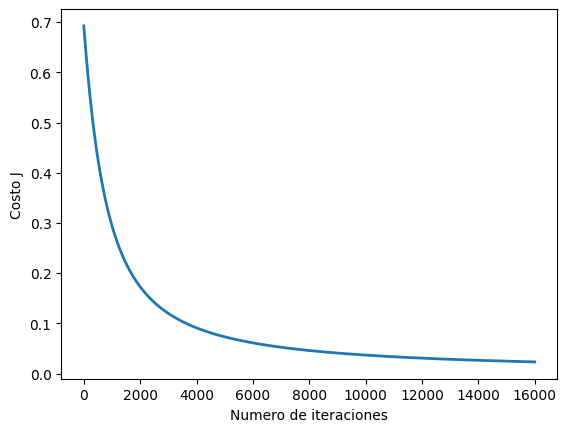

In [153]:
alpha = 0.003
num_iters = 16000

theta = np.zeros(X.shape[1])
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('J: ',J_history[-1])
print('--------------------------------------------------------------------------')
# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
print('--------------------------------------------------------------------------')

Funcion saca todos los datos predichos con los thetas calculados

In [154]:
def predictEntre(theta, X):
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Prueba de eficacia en porcentaje con los datos de entrenamiento

In [155]:
p = predictEntre(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))

Precisión de entrenamiento: 99.97 %


Medicion de eficacia con Datos de prueba

In [156]:
def predictPrue(theta, X):
    p = np.zeros(m_predic)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [157]:
p_predic = predictPrue(theta, X_predic)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p_predic == y_predic) * 100))

Precisión de entrenamiento: 99.44 %


In [158]:
for i in range(m_predic):
  X_array = np.array(X_predic[i])
  Prediccion = np.round(sigmoid(np.dot(X_array, theta)))
  print('La predicción es: ',Prediccion,'El valor original es de: ', y_predic[i])

La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor original es de:  0
La predicción es:  0.0 El valor

Prueba de Regresión, Predicción y La Medida de Precisción de ests con Sklearn:

In [159]:
X_new = X_predic
y_new = y_predic

model = LogisticRegression()
model.fit(X, y)

y_pred_new = model.predict(X_new)

# Calcula las métricas de evaluación en porcentajes
accuracy_new = accuracy_score(y_new, y_pred_new) * 100
precision_new = precision_score(y_new, y_pred_new) * 100
recall_new = recall_score(y_new, y_pred_new) * 100
f1_new = f1_score(y_new, y_pred_new) * 100

if len(set(y_new)) > 1:
    roc_auc_new = roc_auc_score(y_new, y_pred_new) * 100
else:
    roc_auc_new = "No es posible calcular el ROC-AUC con una sola clase."

cm_new = confusion_matrix(y_new, y_pred_new)

# Imprime los resultados en porcentajes
print(f"Exactitud (Accuracy) con nuevos datos: {accuracy_new:.2f}%")
print(f"Precisión (Precision) con nuevos datos: {precision_new:.2f}%")
print(f"Recall con nuevos datos: {recall_new:.2f}%")
print(f"F1-Score con nuevos datos: {f1_new:.2f}%")
print(f"ROC-AUC con nuevos datos: {roc_auc_new}")
print(f"Matriz de Confusión con nuevos datos:\n{cm_new}")

Exactitud (Accuracy) con nuevos datos: 99.48%
Precisión (Precision) con nuevos datos: 60.00%
Recall con nuevos datos: 83.33%
F1-Score con nuevos datos: 69.77%
ROC-AUC con nuevos datos: 91.4652162234757
Matriz de Confusión con nuevos datos:
[[2472   10]
 [   3   15]]
